In [9]:
import numpy as np
import pickle
import tensorflow as tf
import math
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


In [10]:
MAX_SEQ_LEN = 10
MIN_SEQ_LEN = 2



((8339, 10, 1), (8339, 1))


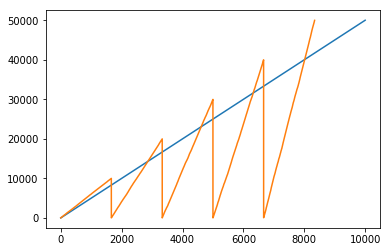

In [13]:
# Create training data
x=[]
y=[]
for d in range(1,6):
    sin_wave = [xt for xt in np.arange(0,10000*d,1*d)]
#     print(sin_wave.shape)
    
    i=0
    while(i<len(sin_wave)-MAX_SEQ_LEN):
        seq_len = np.random.randint(MIN_SEQ_LEN,MAX_SEQ_LEN+1)

        x.append(sin_wave[i:i+seq_len])
        y.append(sin_wave[i+seq_len])
#         i+=1
        i+=seq_len

plt.plot(sin_wave)
plt.plot(y)
padX = pad_sequences(x, maxlen=MAX_SEQ_LEN,dtype='float32')
x = np.array(padX)
x = np.expand_dims(x, axis=2)
y = np.array(y)
y = np.expand_dims(y, axis=1)
x,y = shuffle(x,y)
print(x.shape, y.shape)

# plt.plot(np.stack(x[0],y[0]))

In [53]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
 

n_steps =  10

X, y = (x,y)
print(X.shape, y.shape)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Bidirectional(LSTM(60,return_sequences=1, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Bidirectional(LSTM(10, activation='relu')))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
hist=model.fit(X, y, epochs=40,batch_size=30, verbose=1,validation_split=0.1)
# demonstrate prediction
x_input = array([70, 71, 72,73,74,75,76,77,78,79])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

((8339, 10, 1), (8339, 1))
Train on 7505 samples, validate on 834 samples
Epoch 1/40
7505/7505 [==============================] - 9s 1ms/step - loss: 86290989.0871 - val_loss: 28173424.8669
Epoch 2/40
7505/7505 [==============================] - 4s 480us/step - loss: 6537591.2161 - val_loss: 2027719.1335
Epoch 3/40
7505/7505 [==============================] - 4s 477us/step - loss: 448742.8947 - val_loss: 26616.9155
Epoch 4/40
7505/7505 [==============================] - 4s 487us/step - loss: 17246.6450 - val_loss: 7123.8507
Epoch 5/40
7505/7505 [==============================] - 4s 489us/step - loss: 2957.1808 - val_loss: 1360.3387
Epoch 6/40
7505/7505 [==============================] - 4s 491us/step - loss: 471.5970 - val_loss: 195.0798
Epoch 7/40
7505/7505 [==============================] - 4s 489us/step - loss: 88.9699 - val_loss: 54.7356
Epoch 8/40
7505/7505 [==============================] - 4s 494us/step - loss: 526.9822 - val_loss: 44.5758
Epoch 9/40
7505/7505 [=================

In [49]:
x_input = array([0, 0, 0,0,0,0,0,0,78000,78001])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=1)
print(yhat)

1/1 [==============================] - 0s 2ms/step
[[77605.78]]


In [57]:
from keras.models import load_model
# model.save('model_ap_gen.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_11 (Bidirectio (None, 240)               117120    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 241       
Total params: 117,361
Trainable params: 117,361
Non-trainable params: 0
_________________________________________________________________


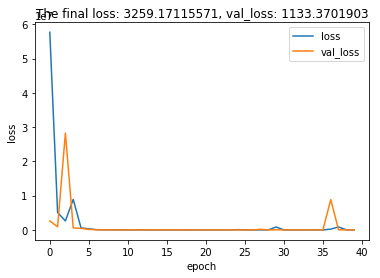

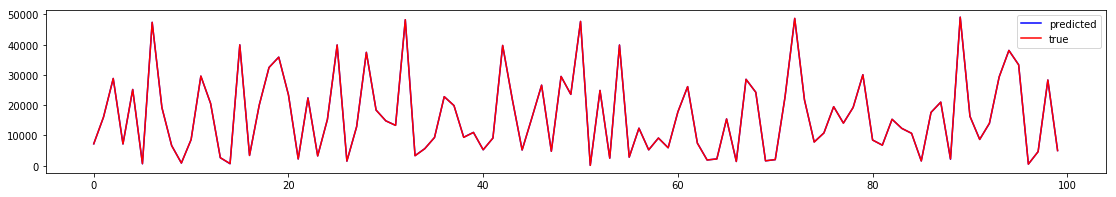

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# hist = model.fit(X_train, y_train, batch_size=120, epochs=1000, 
#                  verbose=True,validation_split=0.05)
for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)

plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("The final loss: {}, val_loss: {}".format(hist.history["loss"][-1],hist.history["val_loss"][-1]))
plt.legend()
plt.show()
y_pred = model.predict(X_test)
plt.figure(figsize=(19,3))
# print(y_test[:2])
# print(y_pred[:2])
plt.plot(y_pred[:100],'b-',label="predicted")
plt.plot(y_test[:100], 'r-', label="true")
plt.legend()
plt.show()

In [27]:
# Creating test data
l = np.random.randint(len(sin))
print l
sin_test=[]
sin_label=[]
i=0
while(i<len(sin)):
    sin_test.append(sin[i][0])
    sin_label.append(sin[i][1])
    i+=1


sin_test = np.expand_dims(sin_test, axis=2)
sin_label = np.array(sin_label)
sin_label = np.expand_dims(sin_label, axis=1)
plt.plot(sin_label)
print(sin_test.shape, sin_label.shape)

NameError: name 'sin' is not defined

10/10 [==============================] - 0s 289us/step
294.8230285644531


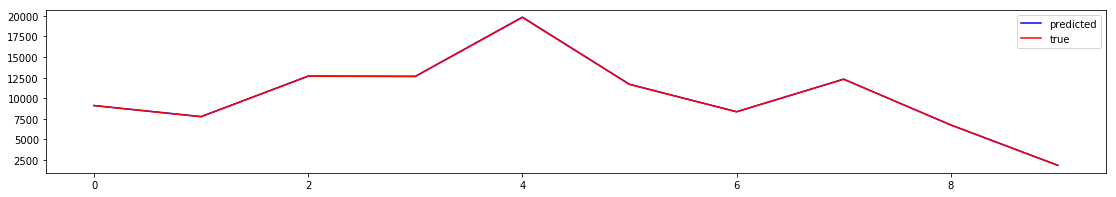

((10, 10, 1), (10, 1))
(array([9099, 9100, 9101, 9102, 9103, 9104, 9105, 9106, 9107]), array([9112.152], dtype=float32))
(array([7750, 7751, 7752, 7753, 7754, 7755, 7756, 7757]), array([7772.791], dtype=float32))
(array([12660, 12661, 12662, 12663]), array([12679.07], dtype=float32))
(array([12629, 12630, 12631, 12632]), array([12648.064], dtype=float32))
(array([19768, 19769, 19770, 19771, 19772, 19773, 19774, 19775]), array([19818.125], dtype=float32))
(array([11669, 11670]), array([11687.681], dtype=float32))
(array([8350, 8351, 8352, 8353, 8354]), array([8361.951], dtype=float32))
(array([12289, 12290, 12291, 12292, 12293, 12294, 12295, 12296, 12297,
       12298]), array([12305.862], dtype=float32))
(array([6752, 6753, 6754, 6755, 6756]), array([6763.382], dtype=float32))
(array([1861, 1862, 1863]), array([1872.3225], dtype=float32))
10/10 [==============================] - 0s 284us/step
170.03646850585938


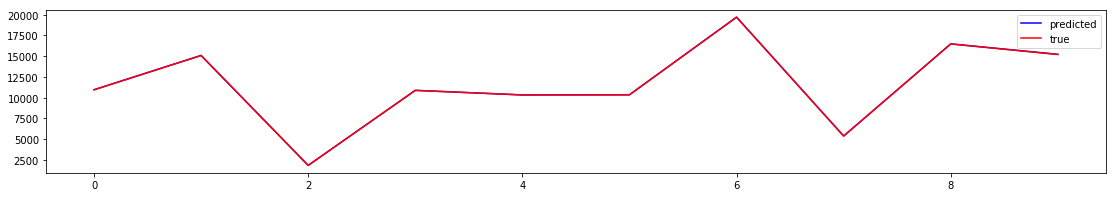

((10, 10, 1), (10, 1))
(array([10937, 10939]), array([10953.093], dtype=float32))
(array([15070, 15072, 15074, 15076]), array([15092.056], dtype=float32))
(array([1812, 1814, 1816, 1818, 1820, 1822, 1824, 1826]), array([1826.6135], dtype=float32))
(array([10856, 10858, 10860, 10862, 10864, 10866, 10868, 10870, 10872,
       10874]), array([10878.272], dtype=float32))
(array([10309, 10311, 10313, 10315]), array([10330.061], dtype=float32))
(array([10329, 10331, 10333, 10335]), array([10350.065], dtype=float32))
(array([19692, 19694, 19696, 19698, 19700]), array([19711.244], dtype=float32))
(array([5351, 5353, 5355, 5357, 5359, 5361, 5363, 5365, 5367, 5369]), array([5368.5757], dtype=float32))
(array([16471, 16473, 16475]), array([16486.035], dtype=float32))
(array([15183, 15185, 15187, 15189, 15191, 15193, 15195, 15197]), array([15227.9], dtype=float32))
10/10 [==============================] - 0s 263us/step
130.60084533691406


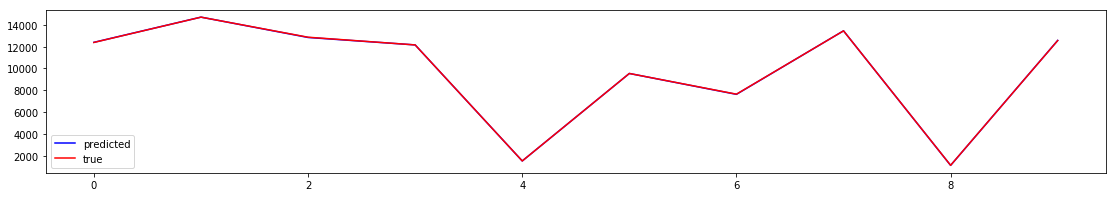

((10, 10, 1), (10, 1))
(array([12365, 12368, 12371, 12374]), array([12388.971], dtype=float32))
(array([14663, 14666, 14669, 14672, 14675, 14678, 14681, 14684, 14687,
       14690]), array([14695.155], dtype=float32))
(array([12836, 12839, 12842, 12845, 12848, 12851, 12854]), array([12833.231], dtype=float32))
(array([12122, 12125, 12128, 12131, 12134, 12137, 12140, 12143, 12146,
       12149]), array([12151.986], dtype=float32))
(array([1516, 1519, 1522, 1525, 1528, 1531]), array([1531.7823], dtype=float32))
(array([9513, 9516, 9519, 9522, 9525, 9528, 9531, 9534, 9537]), array([9538.15], dtype=float32))
(array([7624, 7627, 7630, 7633, 7636, 7639, 7642]), array([7628.0576], dtype=float32))
(array([13423, 13426, 13429, 13432, 13435]), array([13443.265], dtype=float32))
(array([1106, 1109, 1112, 1115, 1118, 1121, 1124, 1127, 1130, 1133]), array([1127.0864], dtype=float32))
(array([12545, 12548]), array([12564.805], dtype=float32))
10/10 [==============================] - 0s 251us/step
14

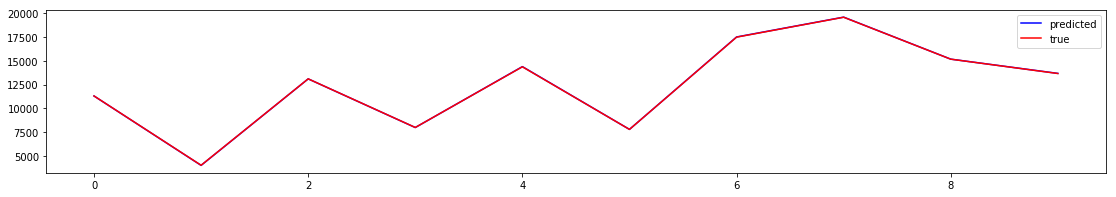

((10, 10, 1), (10, 1))
(array([11253, 11257, 11261, 11265, 11269, 11273, 11277, 11281, 11285,
       11289]), array([11288.879], dtype=float32))
(array([3961, 3965, 3969, 3973, 3977, 3981, 3985]), array([3974.3948], dtype=float32))
(array([13056, 13060, 13064, 13068, 13072, 13076, 13080, 13084, 13088,
       13092]), array([13093.417], dtype=float32))
(array([7935, 7939, 7943, 7947, 7951, 7955, 7959, 7963, 7967]), array([7964.6797], dtype=float32))
(array([14333, 14337, 14341, 14345, 14349, 14353, 14357, 14361]), array([14386.377], dtype=float32))
(array([7748, 7752, 7756, 7760, 7764]), array([7769.497], dtype=float32))
(array([17467, 17471, 17475, 17479, 17483, 17487]), array([17510.156], dtype=float32))
(array([19582, 19586]), array([19601.805], dtype=float32))
(array([15150, 15154, 15158, 15162, 15166]), array([15174.133], dtype=float32))
(array([13635, 13639, 13643, 13647, 13651, 13655]), array([13672.532], dtype=float32))
10/10 [==============================] - 0s 269us/step
130.

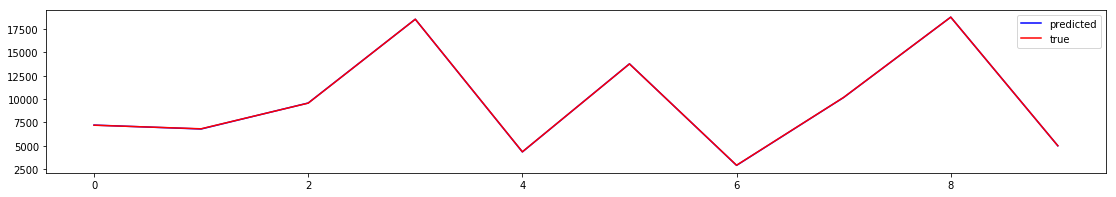

((10, 10, 1), (10, 1))
(array([7169, 7174, 7179]), array([7197.41], dtype=float32))
(array([6764, 6769, 6774, 6779, 6784, 6789, 6794]), array([6778.2744], dtype=float32))
(array([9537, 9542, 9547]), array([9561.172], dtype=float32))
(array([18499, 18504, 18509, 18514, 18519, 18524, 18529, 18534, 18539]), array([18543.203], dtype=float32))
(array([4289, 4294, 4299, 4304, 4309, 4314, 4319, 4324, 4329]), array([4321.5034], dtype=float32))
(array([13722, 13727, 13732, 13737, 13742, 13747]), array([13763.571], dtype=float32))
(array([2858, 2863, 2868, 2873, 2878, 2883, 2888]), array([2877.3738], dtype=float32))
(array([10115, 10120, 10125, 10130, 10135, 10140, 10145, 10150, 10155,
       10160]), array([10156.541], dtype=float32))
(array([18723, 18728, 18733, 18738, 18743, 18748, 18753, 18758, 18763]), array([18767.389], dtype=float32))
(array([4941, 4946, 4951, 4956, 4961, 4966, 4971, 4976]), array([4978.218], dtype=float32))


In [58]:
# padded test data

# model = load_model('model_ap_gen.h5')
files = ["ap_1","ap_2","ap_3","ap_4","ap_5"]
for filename in files:
    x_orig=[]
    sin=[]
    seq=[]
    
    with open('../'+filename+'.pkl','rb') as fp:
        sin = np.array(pickle.load(fp))
    for i in range(len(sin)):
        x_orig.append(np.array(sin[i][0]))
        seq.append(np.array(sin[i][0]))

    sinee = pad_sequences(seq,maxlen=MAX_SEQ_LEN,dtype='float32')
    for i in range(len(sin)):
        sin[i][0] = np.array(sinee[i])
    
    sin_test=[]
    sin_label=[]
    i=0
    while(i<len(sin)):
        sin_test.append(sin[i][0])
        sin_label.append(sin[i][1])
        i+=1


    sin_test = np.expand_dims(sin_test, axis=2)
    sin_label = np.array(sin_label)
    sin_label = np.expand_dims(sin_label, axis=1)
    # sin_test,sin_label = shuffle(sin_test,sin_label)
    print( model.evaluate(sin_test, sin_label))
    y_pred = model.predict(sin_test)
    plt.figure(figsize=(19,3))
    # print(sin_label)
    # print(y_pred)
    plt.plot(y_pred[:],'b-',label="predicted")
    plt.plot(sin_label[:], 'r-', label="true")
    plt.legend()
    plt.show()
    print(sin_test.shape, sin_label.shape)

    for i in range(len(y_pred)):
        print(x_orig[i], y_pred[i])
#     with open (filename+"_gen.txt",'w') as f:
#         for i in range(len(y_pred)):
#             f.write(str(x_orig[i]))
#             f.write(" "+str(y_pred[i][0])+"\n")


1/1 [==============================] - 0s 2ms/step
0.86431884765625
1/1 [==============================] - 0s 2ms/step
4.8365631103515625
1/1 [==============================] - 0s 4ms/step
42.19923400878906
1/1 [==============================] - 0s 3ms/step
42.16117858886719
1/1 [==============================] - 0s 2ms/step
116.82569885253906
1/1 [==============================] - 0s 2ms/step
67.91755676269531
1/1 [==============================] - 0s 1ms/step
9.105777740478516
1/1 [==============================] - 0s 2ms/step
17.62523651123047
1/1 [==============================] - 0s 2ms/step
7.378332138061523
1/1 [==============================] - 0s 2ms/step
92.34243774414062
((10, 10, 1), (10, 1))
10/10 [==============================] - 0s 209us/step
40.12942886352539


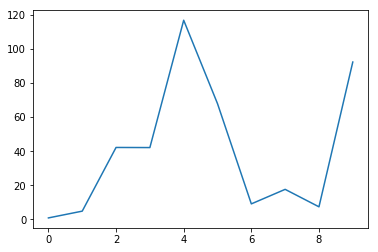

In [15]:
for i in range(len(sin)):
    sin_test=sin[i][0]
    sin_label=sin[i][1]
#     plt.plot(sin_test)dd
#     print(sin_test.shape)
    sin_test = np.expand_dims(sin_test, axis=0)
    sin_test = np.expand_dims(sin_test, axis=2)
#     print(sin_test.shape)
    
#     sin_label = np.array(sin_label)
    sin_label = np.expand_dims(sin_label, axis=0)
    sin_label = np.expand_dims(sin_label, axis=1)
#     sin_test,sin_label = shuffle(sin_test,sin_label)
#     print(sin_test.shape, sin_label.shape)
    print model.evaluate(sin_test,sin_label)
# plt.show()
xt=[]
yt=[]
for i in range(len(sin)):
    xt.append(sin[i][0])
    yt.append(sin[i][1])
    
xt = np.array(xt)
xt = np.expand_dims(xt, axis=2)
yt = np.array(yt)
yt = np.expand_dims(yt, axis=1)
print(xt.shape,yt.shape)
print model.evaluate(xt,yt)
yt_pred = model.predict(xt)
# plt.plot(yt)
# plt.plot(yt_pred)
# plt.show()
plt.plot((yt_pred-yt)*(yt_pred-yt))